In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline

In [9]:
pandas_profiling.ProfileReport(pd.read_csv('telecom_users.csv'))

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
tel=pd.read_csv('telecom_users.csv')

In [11]:
tel.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [12]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [13]:
#Replacing_No_Internet_Servies_As_No
cols=['OnlineBackup','StreamingTV','StreamingMovies','DeviceProtection','TechSupport','OnlineSecurity']
for i in cols:
    tel[i]=tel[i].replace({'No internet service':'No'})

<AxesSubplot:xlabel='gender', ylabel='count'>

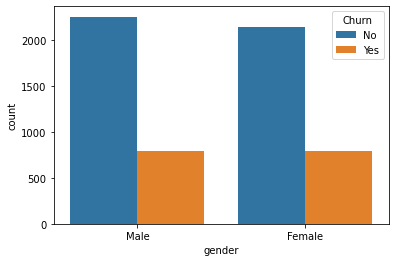

In [14]:
#Visualizing the churn for both male and female
sns.countplot(x='gender',hue='Churn',data=tel)

<AxesSubplot:xlabel='tenure', ylabel='count'>

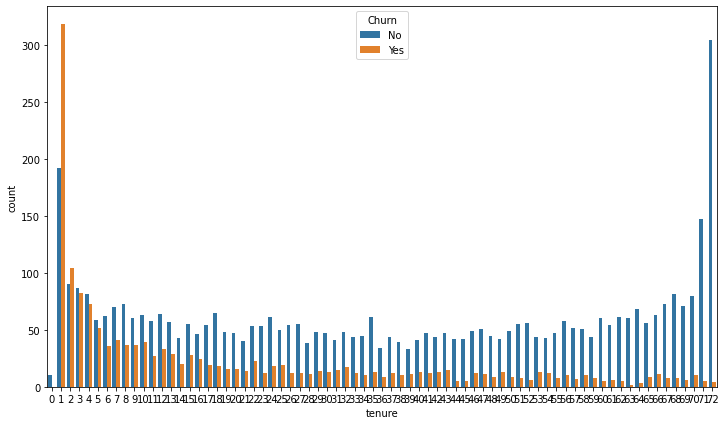

In [15]:
#Visualizing the churn for tenure
plt.figure(figsize=(12,7))
sns.countplot(x='tenure',hue='Churn',data=tel, alpha=1)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

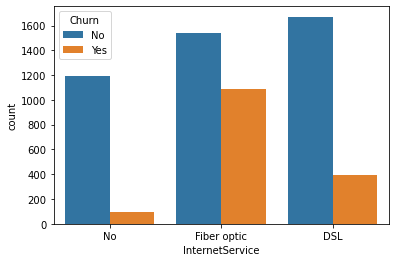

In [16]:
#Visualizing the curn count for Internet service
sns.countplot(x='InternetService',hue='Churn',data=tel)

In [17]:
#Converting_Total_Charges_To_Numerical_Data_Type
tel.TotalCharges=pd.to_numeric(tel.TotalCharges,errors='coerce')

In [18]:
tel.isnull().sum()

Unnamed: 0           0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [19]:
#Removing_Missing_variables
tel.dropna(inplace=True)

In [20]:
#Converting_predictor_variables_into_binary_numerical_variables
tel['Churn'].replace(to_replace='Yes', value=1, inplace=True)
tel['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [21]:
#Removing_the_Unnamed:0_attribute
tel=pd.get_dummies(tel,drop_first=True)
tel.drop('Unnamed: 0',axis=1,inplace=True)

# LOGISTIC REGRESSION

In [22]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [23]:
y = tel['Churn'].values
X = tel.drop('Churn',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
model=LogisticRegression()
model.fit(X_train,y_train)
predictions=model.predict(X_test)

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.792526491912995